# Lab 3 - General solutions

Finding general solutions can be fairly mathematically intensive. A computer can help.

Below are two simpler examples to demonstrate the coding technique.

## Exponential population growth in discrete time

In [2]:
from sympy import *

# define symbols and function
R, t, n0 = symbols('R, t, n0') #define symbols for reproductive factor, time, and intitial population size
n = Function('n') #define population size as a function

# solve recursion equation
rsolve(Eq(n(t+1), R * n(t)), # the recursion
       n(t), #the function we want to solve for
       {n(0): n0}) #the initial condition

R**t*n0

## Logistic population growth in continuous time

In [3]:
# define symbols and function
r,k,t,n0 = var('r, k, t, n0') #define the parameters, variables, and initial condition
n = Function('n')(t) #define a general function

# solve differential equation
f = dsolve(
    Eq(Derivative(n,t), r * n * (1 - n / k)), #the differential equation we want to solve
    n, #the function we want to solve for
    ivar = t, #the independent variable we want the function to be of
    ics={n.subs(t,0): n0} #the initial condition
)

f.simplify() # in this case it is helpful to simplify the final expression

Eq(n(t), k*n0*exp(r*t)/(k + n0*exp(r*t) - n0))

## Question

Sink populations are defined as populations that are maintained by migration from another source population. Here we consider a sink population, with a negative intrinsic growth rate, $r<0$, that receives immigrants at rate $m$, which is decreasing over time due to habitat deterioration in migration corridors, $m=m_0-\delta \;t$. The differential equation describing this situation is 

$$\frac{\mathrm{d}n}{\mathrm{d}t} = r n + m_0 - \delta\; t.$$

Use ```dsolve``` to get the general solution, $n(t)$.

In [6]:
# define symbols and function
r, m0, delta,t = var('r, m0, delta, t') #define the parameters, variables, and initial condition
n = Function('n')(t) # defina function as the general solution

# solve differential equation
f = dsolve(
    Eq(Derivative(n,t), r * n + m0 - delta * t), # the differential equation we want to solve
    n, #the function we want to solve for
    ivar = t, #the independent variable we want the function to be of
    ics={n.subs(t,0): 0} #the initial condition
)

f.simplify() # in this case it is helpful to simplify the final expression


Eq(n(t), (delta + r*(delta*t - m0) + (-delta + m0*r)*exp(r*t))/r**2)

Plot this solution from $t=0$ to $t=80$ using $r=-0.01$, $m_0=0.5$, $\delta=0.02$, and $n(0)=40$.

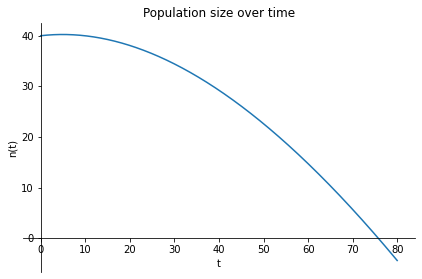

In [7]:

# impose n(0) = 40 instead of 0
f = dsolve(
    Eq(Derivative(n, t), r*n + m0 - delta*t),
    n,
    ics={n.subs(t, 0): 40}
)

plot(f.rhs.subs({r:-0.01, m0:0.5, delta:0.02}), (t,0,80), ylabel='n(t)', xlabel='t', title='Population size over time')


Use the general solution to solve for the time the population will go extinct under these parameter values.